
# Logistic Regression on Iris Dataset



In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Load the dataset (Ensure Iris.csv is in the same directory as this notebook)
iris_df = pd.read_csv("Iris.csv")

# Display first few rows of the dataset
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:

# Encode the target variable
iris_df['Species'] = iris_df['Species'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)

# Define independent (X) and dependent (y) variables
X = iris_df.drop(columns=['Id', 'Species'])
y = iris_df['Species']

# Display unique values in y to confirm encoding
y.value_counts()


Species
1    100
0     50
Name: count, dtype: int64

In [3]:

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)


[1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1]


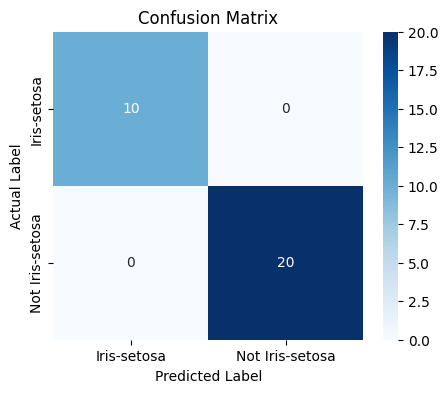

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Overall Accuracy: 1.0000


In [5]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=["Iris-setosa", "Not Iris-setosa"], yticklabels=["Iris-setosa", "Not Iris-setosa"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:", classification_report(y_test, y_pred))

# Calculate and print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")


### Analysis of Model Performance

Based on the confusion matrix and classification report, the model appears to be performing perfectly. The confusion matrix shows no false positives or false negatives, and the classification report indicates precision and recall values of 1 for both classes.

- **Precision**: 1.00
- **Recall**: 1.00

This means that the model has both high precision and high recall, indicating that it is correctly identifying all instances of each class without making any incorrect predictions. Therefore, the model has similar values for both precision and recall, demonstrating excellent performance on the test set.

# Manual calculations and comparison of results:

In [7]:
# Manually calculate accuracy, precision, and recall

# Extract values from confusion matrix
TP = conf_matrix[0, 0]  # True Positives (Setosa correctly classified)
FN = conf_matrix[0, 1]  # False Negatives (Setosa misclassified as not-Setosa)
FP = conf_matrix[1, 0]  # False Positives (Not-Setosa misclassified as Setosa)
TN = conf_matrix[1, 1]  # True Negatives (Not-Setosa correctly classified)

# Compute metrics manually
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Print results
print(f"Manual Accuracy: {accuracy:.4f}")
print(f"Manual Precision: {precision:.4f}")
print(f"Manual Recall: {recall:.4f}")

# Compare manual calculations with scikit-learn's results
sklearn_accuracy = accuracy_score(y_test, y_pred)
sklearn_precision = precision_score(y_test, y_pred)
sklearn_recall = recall_score(y_test, y_pred)

print(f"Scikit-learn Accuracy: {sklearn_accuracy:.4f}")
print(f"Scikit-learn Precision: {sklearn_precision:.4f}")
print(f"Scikit-learn Recall: {sklearn_recall:.4f}")

if (accuracy == sklearn_accuracy) and (precision == sklearn_precision) and (recall == sklearn_recall):
	print("Manual calculations match scikit-learn's results.")


Manual Accuracy: 1.0000
Manual Precision: 1.0000
Manual Recall: 1.0000
Scikit-learn Accuracy: 1.0000
Scikit-learn Precision: 1.0000
Scikit-learn Recall: 1.0000
Manual calculations match scikit-learn's results.


### Analysis and Summary

The logistic regression model trained on the Iris dataset has demonstrated excellent performance in classifying whether a given iris flower belongs to the Iris-setosa class or not. 

Overall, the logistic regression model has successfully achieved the objective of accurately classifying Iris-setosa flowers, demonstrating high precision and recall, and validating the results through manual calculations.